In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('online_shoppers_intention.csv')
print(df.shape)

(12330, 18)


In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


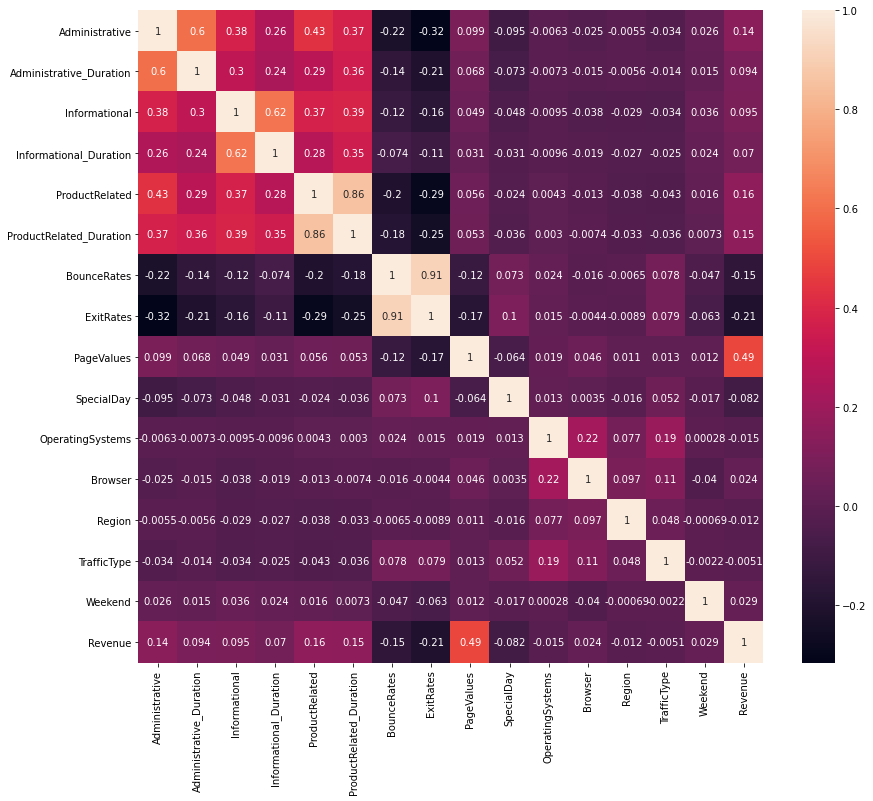

In [8]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
df1= df.iloc[:,:15]

In [10]:
mm= df1['Month']
df1.drop({'Month'}, axis=1, inplace=True)

In [11]:
col= df1.columns

In [12]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer()

In [13]:
df1 = pt.fit_transform(df1)

In [14]:
df1= pd.DataFrame(df1,columns=col)

In [15]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,-1.594583,-1.630444,-1.116671,-1.458641
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,0.023949,0.100778,-1.116671,-0.386728
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,1.816290,-1.630444,1.658089,0.199041
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,1.065020,0.100778,-0.199574,0.574105
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,1.065020,0.918635,-1.116671,0.574105


In [16]:
dfr= df[['Month', 'VisitorType', 'Weekend', 'Revenue']]
dfr.head()

,Month,VisitorType,Weekend,Revenue
0,Feb,Returning_Visitor,False,False
1,Feb,Returning_Visitor,False,False
2,Feb,Returning_Visitor,False,False
3,Feb,Returning_Visitor,False,False
4,Feb,Returning_Visitor,True,False


In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
for i in dfr.columns:
    dfr[i] = LabelEncoder().fit_transform(dfr[i])

<ipython-input-19-b91f283a0db4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr[i] = LabelEncoder().fit_transform(dfr[i])


In [20]:
dfr.head()

,Month,VisitorType,Weekend,Revenue
0,2,2,0,0
1,2,2,0,0
2,2,2,0,0
3,2,2,0,0
4,2,2,1,0


In [21]:
df1= df1.join(dfr)

In [22]:
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Month,VisitorType,Weekend,Revenue
0,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,-1.594583,-1.630444,-1.116671,-1.458641,2,2,0,0
1,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.074189,-0.799209,1.569866,-0.529409,-0.33602,0.023949,0.100778,-1.116671,-0.386728,2,2,0,0
2,-0.990128,-0.996659,-0.520489,-0.491697,-1.922123,-2.096783,2.206432,1.982547,-0.529409,-0.33602,1.816290,-1.630444,1.658089,0.199041,2,2,0,0
3,-0.990128,-0.996659,-0.520489,-0.491697,-1.574524,-1.875436,1.709303,1.832073,-0.529409,-0.33602,1.065020,0.100778,-0.199574,0.574105,2,2,0,0
4,-0.990128,-0.996659,-0.520489,-0.491697,-0.442610,0.057515,0.756734,0.722460,-0.529409,-0.33602,1.065020,0.918635,-1.116671,0.574105,2,2,1,0


In [24]:
import scipy.cluster.hierarchy as sch
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
rev= df1['Revenue']
df1.drop({'Revenue'}, axis=1, inplace=True)

In [27]:
we= []
sc= []
for i in range(2, 15):
    km= KMeans(n_clusters=i, random_state=42)
    km.fit(df1)
    we.append(km.inertia_)
    lab= km.labels_
    sc.append(silhouette_score(df1,lab))

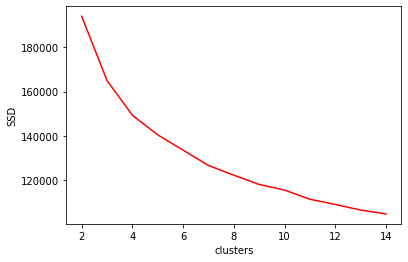

In [28]:
plt.plot(range(2,15), we, 'r')
plt.xlabel('clusters')
plt.ylabel('SSD')
plt.show()

In [29]:
# For KMeans optimum number of cluster is 3

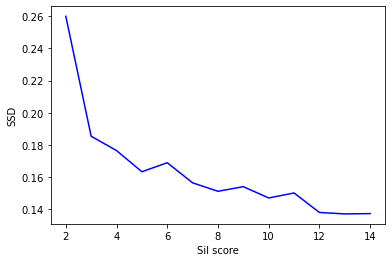

In [30]:
plt.plot(range(2,15), sc, 'b')
plt.xlabel('Sil score')
plt.ylabel('SSD')
plt.show()

In [31]:
km= KMeans(n_clusters=2, random_state=42)
km.fit(df1.iloc[:,:17])

KMeans(n_clusters=2, random_state=42)

In [32]:
lab= km.labels_
df1['kmeans_label'] = lab

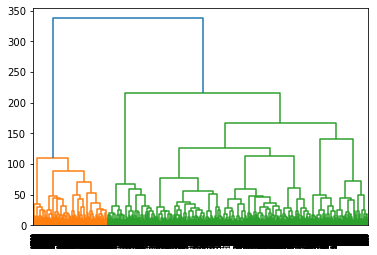

In [34]:
# Agglomerative 

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(df1, method='ward'))

In [35]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(df1)
labels = model.labels_

In [36]:
df1['agg_cl'] = labels
df1['real'] = rev

pd.crosstab(df1['agg_cl'], df1['real'])

real,0,1
agg_cl,,
0,8020,1554
1,2402,354


In [37]:
# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
pca = PCA()
pca.fit(df1.iloc[:,:17])

PCA()

In [39]:
pca.explained_variance_

array([5.70769722, 4.21589723, 1.61994136, 1.46523601, 1.15699505,
       1.05827083, 1.00057941, 0.9724255 , 0.82118087, 0.75425643,
       0.5586385 , 0.37655049, 0.20613531, 0.17419618, 0.09212853,
       0.05156225, 0.04295098])

In [40]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28151901, 0.48945843, 0.5693583 , 0.64162769, 0.69869381,
       0.75089058, 0.80024185, 0.8482045 , 0.88870735, 0.92590931,
       0.95346287, 0.97203535, 0.9822025 , 0.99079433, 0.99533835,
       0.99788154, 1.        ])

In [ ]:
10 of the PCA components are explaining over 95% of variance in the target variable.

In [41]:
pca = PCA(n_components=10)
pca.fit(df1.iloc[:,:17])
X_pca = pca.transform(df1.iloc[:,:17])
X_pca.shape

(12330, 10)

In [42]:
X_pca

array([[ 3.96785453, -3.15722686,  1.85215673, ..., -1.26255046,
        -0.0504977 ,  0.45972142],
       [ 3.66514005, -1.76491049, -0.01819126, ..., -1.09396967,
         0.25494107,  0.55265284],
       [ 3.96635746, -3.19045066,  1.42319175, ...,  0.94570355,
        -0.88983437, -0.30611277],
       ...,
       [-1.28554906, -3.0950321 ,  0.96916536, ..., -1.17505276,
        -1.43253792, -0.88198258],
       [-1.90996153,  0.05167406, -1.14737824, ...,  0.22578623,
        -0.0198387 , -0.80240356],
       [-1.22607129, -2.62839278, -0.65539893, ..., -1.20864187,
         0.58324809,  0.76846848]])

In [43]:
xpca= pd.DataFrame(X_pca, columns=[i for i in range(10)])

In [44]:
xpca

,0,1,2,3,4,5,6,7,8,9
0,3.967855,-3.157227,1.852157,-2.473557,0.078589,-0.558001,-0.953455,-1.262550,-0.050498,0.459721
1,3.665140,-1.764910,-0.018191,-0.207546,-0.165361,-0.545207,0.790807,-1.093970,0.254941,0.552653
2,3.966357,-3.190451,1.423192,0.356660,1.693341,-0.281747,-0.720689,0.945704,-0.889834,-0.306113
3,3.842579,-2.801770,1.073932,0.833321,1.047133,0.111045,0.066903,-0.639180,-0.699332,-0.047416
4,3.427203,-1.026062,0.059997,1.414241,-0.540125,0.294762,0.522586,-1.178781,-0.680046,-0.552744
...,...,...,...,...,...,...,...,...,...,...
12325,3.717338,2.560343,-1.035019,2.128029,-0.208718,-0.163738,-1.828935,-2.153729,-0.470230,1.046296
12326,-1.549349,-1.612734,-0.964443,0.682029,-0.308619,0.194674,1.965102,-0.726031,-0.438501,-0.271849
12327,-1.285549,-3.095032,0.969165,0.991682,0.403127,0.876051,0.550889,-1.175053,-1.432538,-0.881983
12328,-1.909962,0.051674,-1.147378,-0.089901,1.499494,0.824296,0.568361,0.225786,-0.019839,-0.802404


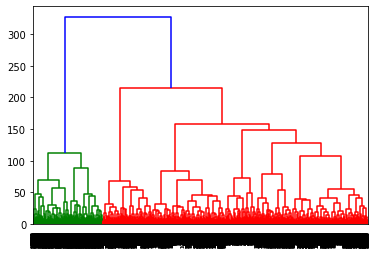

In [66]:
# Applying the agglomerative clustering on this
dendrogram = sch.dendrogram(sch.linkage(xpca, method='ward'))

In [ ]:
# For Agglo, optimum number of cluster is 3

# but lets try with 2 first

In [45]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(xpca)
labels = model.labels_

In [46]:
xpca['agg_cl'] = labels
xpca['real'] = rev

pd.crosstab(xpca['agg_cl'], xpca['real'])

real,0,1
agg_cl,,
0,8159,1591
1,2263,317


In [48]:
xpca

,0,1,2,3,4,5,6,7,8,9,agg_cl,real
0,3.967855,-3.157227,1.852157,-2.473557,0.078589,-0.558001,-0.953455,-1.262550,-0.050498,0.459721,1,0
1,3.665140,-1.764910,-0.018191,-0.207546,-0.165361,-0.545207,0.790807,-1.093970,0.254941,0.552653,1,0
2,3.966357,-3.190451,1.423192,0.356660,1.693341,-0.281747,-0.720689,0.945704,-0.889834,-0.306113,1,0
3,3.842579,-2.801770,1.073932,0.833321,1.047133,0.111045,0.066903,-0.639180,-0.699332,-0.047416,1,0
4,3.427203,-1.026062,0.059997,1.414241,-0.540125,0.294762,0.522586,-1.178781,-0.680046,-0.552744,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.717338,2.560343,-1.035019,2.128029,-0.208718,-0.163738,-1.828935,-2.153729,-0.470230,1.046296,1,0
12326,-1.549349,-1.612734,-0.964443,0.682029,-0.308619,0.194674,1.965102,-0.726031,-0.438501,-0.271849,0,0
12327,-1.285549,-3.095032,0.969165,0.991682,0.403127,0.876051,0.550889,-1.175053,-1.432538,-0.881983,0,0
12328,-1.909962,0.051674,-1.147378,-0.089901,1.499494,0.824296,0.568361,0.225786,-0.019839,-0.802404,0,0
